In [56]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


# Tourist Carrying Capacity (TCC) - Linear Programming (LP) Formulation

In [2]:
import pandas as pd
from datasets_tourism import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

> 2024-09-26 08:02:25,711 [info] Project loaded successfully: {'project_name': 'overtourism'}


What kind of questions can we pose related to parking slots?

# Setup timeframe

In [114]:
START_DATE = "2023-07-01"
END_DATE= "2023-09-30"

# Dati Parcheggi

In [115]:
def parcheggi_timeframe(start_date, end_date):
    statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
    statistiche_parcheggi_molveno_timeframe_df = statistiche_parcheggi_molveno_df[
        (statistiche_parcheggi_molveno_df["date"] >= start_date) & 
        (statistiche_parcheggi_molveno_df["date"] <= end_date)
    ]
    return statistiche_parcheggi_molveno_timeframe_df

statistiche_parcheggi_molveno_timeframe_df = parcheggi_timeframe(START_DATE, END_DATE)
statistiche_parcheggi_molveno_timeframe_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
339,0.0,4.0,3.0,3.0,3.0,4.0,8.0,4.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,2023-07-01
340,4.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,...,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,2023-07-02
341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-07-03
342,3.0,0.0,1.0,2.0,4.0,4.0,5.0,6.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,2023-07-04
343,2.0,2.0,3.0,2.0,5.0,4.0,15.0,5.0,8.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,63.0,2023-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.0,0.0,1.0,0.0,0.0,1.0,6.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,2023-09-26
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29


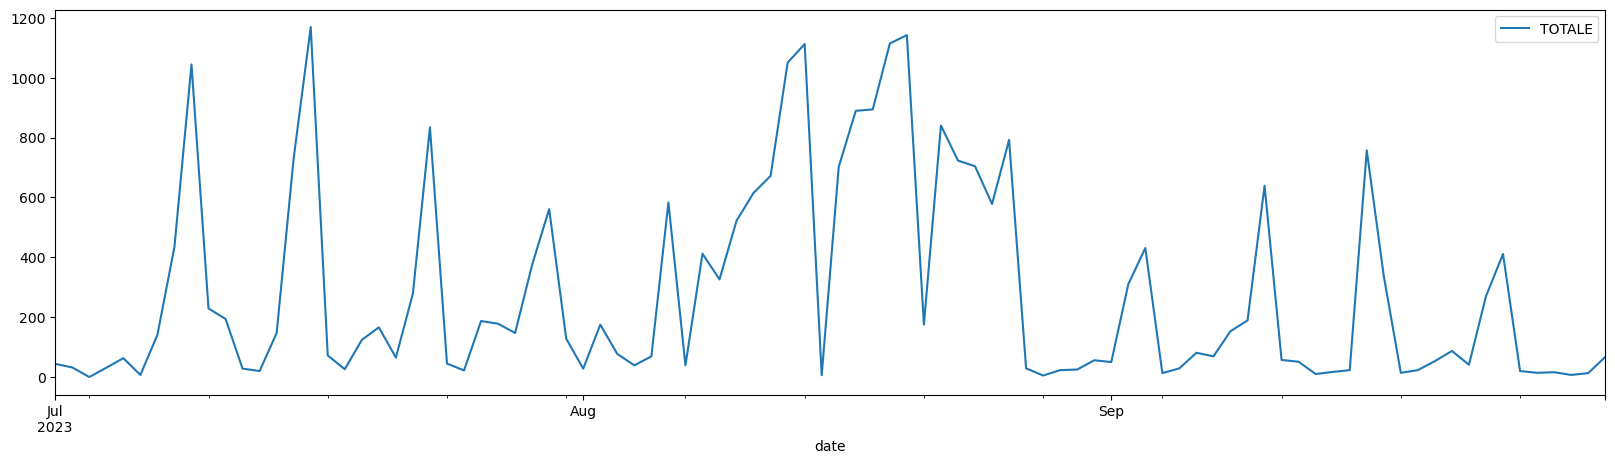

In [116]:
statistiche_parcheggi_molveno_timeframe_df.plot(y=["TOTALE"], x="date", figsize=(20,5))
plt.show()

In [117]:
columns = statistiche_parcheggi_molveno_timeframe_df.columns
num_cols = columns[:-1]
statistiche_parcheggi_molveno_timeframe_df[num_cols] = statistiche_parcheggi_molveno_timeframe_df[num_cols].astype("int")
statistiche_parcheggi_molveno_timeframe_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
339,0,4,3,3,3,4,8,4,3,12,...,0,0,0,0,0,0,0,0,44,2023-07-01
340,4,0,0,1,2,0,1,0,2,2,...,2,11,0,0,0,0,0,0,32,2023-07-02
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-07-03
342,3,0,1,2,4,4,5,6,2,2,...,0,0,0,0,0,0,0,0,31,2023-07-04
343,2,2,3,2,5,4,15,5,8,7,...,0,0,0,1,0,0,0,0,63,2023-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0,0,1,0,0,1,6,2,2,1,...,0,0,0,0,0,0,0,0,14,2023-09-26
427,0,2,1,1,0,1,1,3,3,2,...,0,0,0,0,0,0,0,0,16,2023-09-27
428,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,2023-09-28
429,0,0,0,0,2,0,1,1,2,5,...,0,0,1,0,0,0,0,0,13,2023-09-29


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

In [119]:
X = statistiche_parcheggi_molveno_timeframe_df[["6 ORE"]]
y = statistiche_parcheggi_molveno_timeframe_df['TOTALE']
X

,6 ORE
339,12
340,2
341,0
342,2
343,7
...,...
426,1
427,2
428,0
429,5


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [121]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

32.653133601023626
[7.22604669]


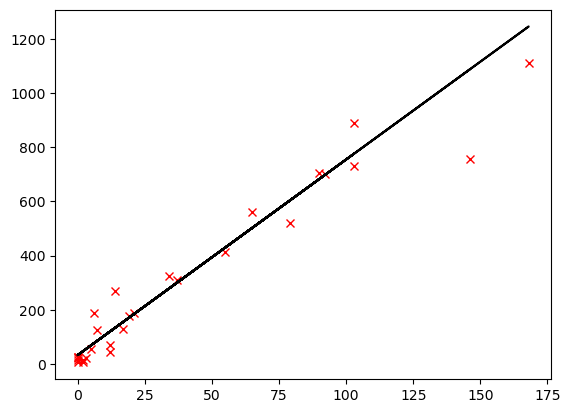

In [122]:
y_pred = linear_regressor.predict(X_test) # make predictions
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

Now we are able to mathematically express the model:

[first equation of the LP formulation]    total_cars = 31 + 7*(6_ore_field)

## Multiple Linear Regression

In [123]:
X = statistiche_parcheggi_molveno_timeframe_df.drop(["TOTALE", 'date'], axis=1)
y = statistiche_parcheggi_molveno_timeframe_df['TOTALE']
X

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,22 ORE,23 ORE,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI
339,0,4,3,3,3,4,8,4,3,12,...,0,0,0,0,0,0,0,0,0,0
340,4,0,0,1,2,0,1,0,2,2,...,0,1,2,11,0,0,0,0,0,0
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,3,0,1,2,4,4,5,6,2,2,...,0,0,0,0,0,0,0,0,0,0
343,2,2,3,2,5,4,15,5,8,7,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0,0,1,0,0,1,6,2,2,1,...,0,0,0,0,0,0,0,0,0,0
427,0,2,1,1,0,1,1,3,3,2,...,0,0,0,0,0,0,0,0,0,0
428,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,2,0,1,1,2,5,...,0,0,0,0,1,0,0,0,0,0


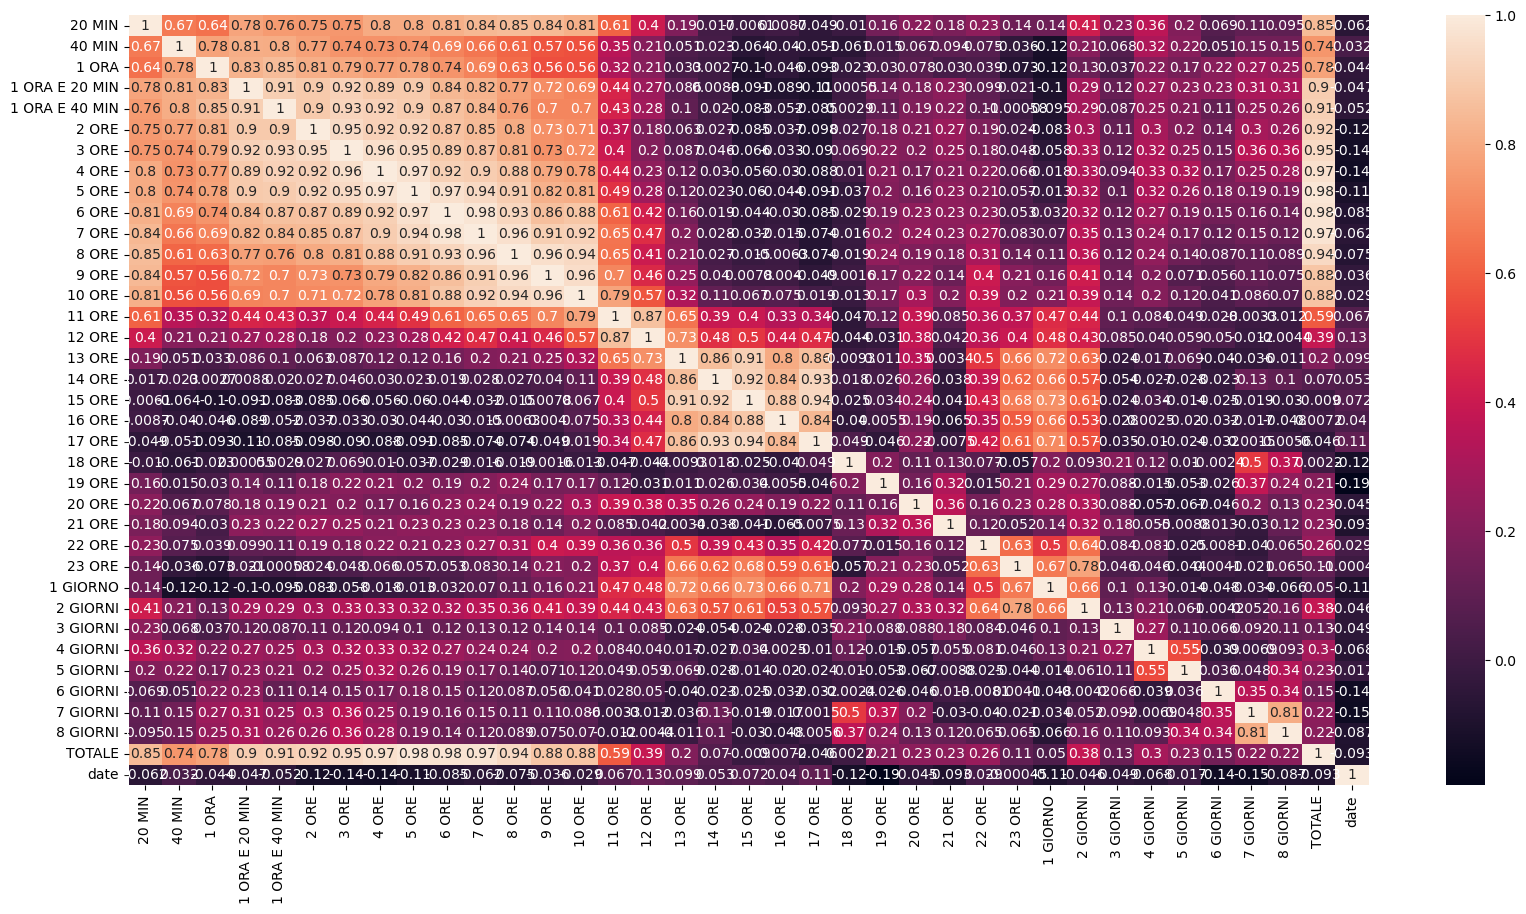

In [124]:
plt.figure(figsize = (20, 10))
sns.heatmap(statistiche_parcheggi_molveno_timeframe_df.corr(), annot = True)
plt.show()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

-1.1368683772161603e-13
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [127]:
y_pred = linear_regressor.predict(X_test) # make predictions
y_pred

array([ 757.,  175.,  731.,  189.,  412.,  522.,   69.,  702.,   53.,
       1112.,  310.,  128.,   44.,   26.,    7.,  187.,   20.,   16.,
        704.,  326.,  124.,   14.,  270.,   25.,    5.,  561.,  889.,
         22.])

# Time Varying Analysis

## Time-varying Correlation

Capturing dynamic changes of time-varying correlation structure is scientifically important in spatio-temporal data analysis.
- **Pearson Correlation**: Also known as linear correlation, Pearson correlation measures the strength and direction of a linear relationship between two continuous variables. It ranges from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.
- **Spearman Correlation**: Spearman correlation measures the monotonic relationship between two variables. It assesses the strength and direction of association between the ranks of variables rather than their actual values. Spearman correlation is suitable for ordinal or non-normally distributed data.
- **Kendall Correlation**: Kendall correlation, also known as Kendall’s tau coefficient, measures the ordinal association between two variables. It evaluates the similarity of the orderings of data points between two variables and is robust to outliers and non-normally distributed data.


# Presenze in spiaggia

In [128]:
contapersone_presenze_df = mlrun.get_dataitem("s3://datalake/projects/overtourism/artifacts/contapersone_presenze.parquet.parquet").as_df()
contapersone_presenze_df.rename(columns={"data": "date"}, inplace=True)
contapersone_presenze_df["date"] = pd.to_datetime(contapersone_presenze_df["date"]) # or contapersone_presenze_df["date"].map(pd.to_datetime)
#contapersone_presenze_df = contapersone_presenze_df[(contapersone_presenze_df['date'] >= START_DATE) & (contapersone_presenze_df['date'] <= END_DATE)] 

varchi = contapersone_presenze_df['varco'].unique()
contapersone = contapersone_presenze_df.copy()
for v in varchi:
    contapersone[v] = contapersone['presenze'] * (contapersone['varco'] == v)
contapersone = contapersone.drop(columns=['varco']).groupby('date').sum().reset_index().rename(columns={'presenze':'contapersone'})
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276
...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419


In [129]:
print(f"{contapersone['contapersone'].std()}")

1029.2480119904706


In [130]:
print(f"Standard deviation: {contapersone['contapersone'].std()}, Mean: {contapersone['contapersone'].mean()}")

Standard deviation: 1029.2480119904706, Mean: 2238.5285714285715


In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
persone_scaled = scaler.fit_transform(contapersone[["contapersone"]]) 
#persone_scaled = pd.DataFrame(persone_scaled, columns=["contapersone"], index=contapersone.index)
contapersone["contapersone_scaled"] = persone_scaled
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9,contapersone_scaled
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140,0.190840
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250,0.355471
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359,0.233333
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238,0.196438
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276,0.152417
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332,0.085242
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321,0.183715
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523,0.242494
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419,0.416285


<AxesSubplot: xlabel='date'>

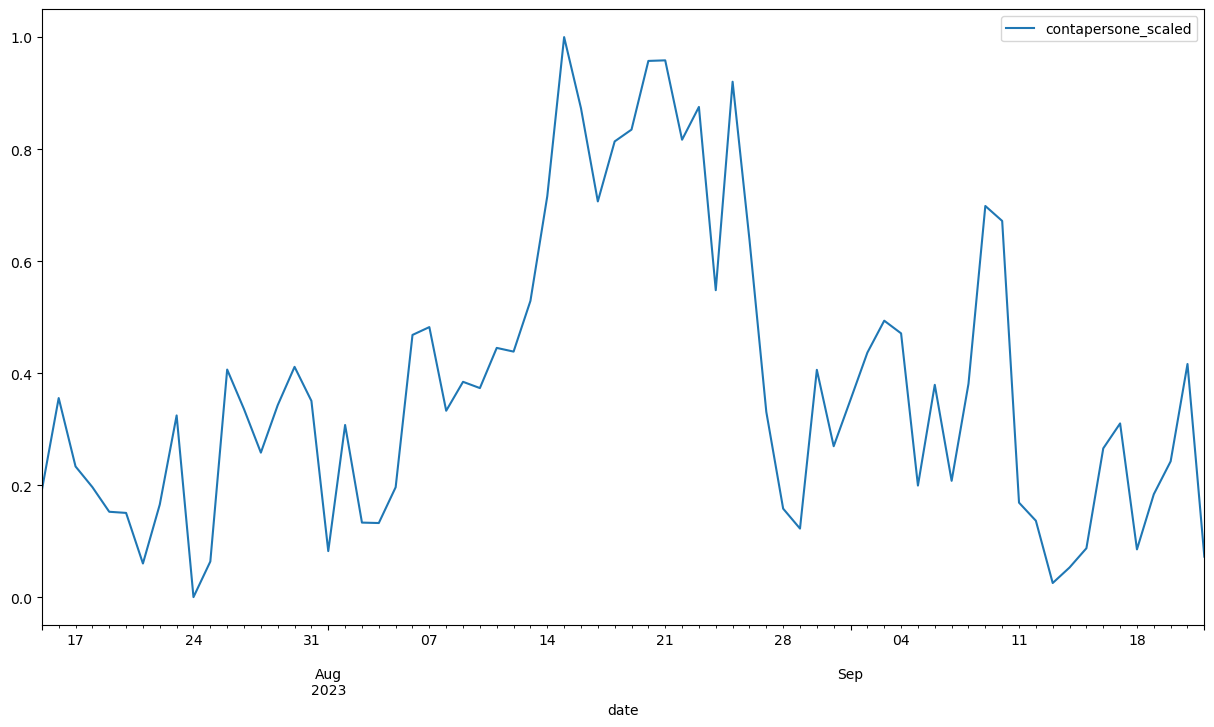

In [213]:
contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", figsize=(15,8))

# Dati Vodafone

In [133]:
vodafone_attendences_df

,date,locType,locId,userCountry,userProfile,userCluster,value
0,2022-01-01,AL_2,22,ALB,COMMUTER,None,0
1,2022-01-01,AL_2,22,ALB,TOURIST,None,862
2,2022-01-01,AL_2,22,ALB,VISITOR,None,44
3,2022-01-01,AL_2,22,AND,TOURIST,None,0
4,2022-01-01,AL_2,22,AND,VISITOR,None,0
...,...,...,...,...,...,...,...
4584498,2024-03-31,TN_MKT_POI,STAZ_TREN,SRB,VISITOR,UE,0
4584499,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,TOURIST,UE,0
4584500,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,VISITOR,UE,0
4584501,2024-03-31,TN_MKT_POI,STAZ_TREN,USA,TOURIST,None,0


In [134]:
LOC_ID_LAGO_MOLVENO = "LAGO_MOLV"
LOC_ID_COMUNE_MOLVENO = "27"
LOC_ID_APT_MOLVENO = "105"

attendances_timeframe_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_df["locId"] == LOC_ID_APT_MOLVENO) | 
         (vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO) | 
         (vodafone_attendences_df["locId"] == LOC_ID_LAGO_MOLVENO))
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2977735,2023-07-01,TN_MKT_AL_3,27,AUT,TOURIST,A,18
2977736,2023-07-01,TN_MKT_AL_3,27,AUT,VISITOR,A,18
2977744,2023-07-01,TN_MKT_AL_3,27,CZE,TOURIST,CZ,108
2977745,2023-07-01,TN_MKT_AL_3,27,CZE,VISITOR,CZ,36
2977746,2023-07-01,TN_MKT_AL_3,27,DEU,TOURIST,DE,216
...,...,...,...,...,...,...,...
3622979,2023-09-30,TN_MKT_POI,LAGO_MOLV,FRA,VISITOR,UE,22
3622985,2023-09-30,TN_MKT_POI,LAGO_MOLV,ITA,TOURIST,IT,858
3622986,2023-09-30,TN_MKT_POI,LAGO_MOLV,ITA,VISITOR,IT,809
3622994,2023-09-30,TN_MKT_POI,LAGO_MOLV,POL,TOURIST,PL,18


In [135]:
attendances_timeframe_df["userProfile"].value_counts()

userProfile
TOURIST    3889
VISITOR    2927
Name: count, dtype: int64

## Calculate tourists and visitors ratio

In [136]:
def calculate_tourist_excursionist_rate(total, tourists, excursionists):
    t_ratio = tourists/total
    e_ratio = excursionists/total
    return f"Tourists: {t_ratio}, Excursionists: {e_ratio}"

### Visitors rate in 'Comune Molveno'

In [137]:
visitors_comune_molveno_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO))
]
visitors_comune_molveno_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2977735,2023-07-01,TN_MKT_AL_3,27,AUT,TOURIST,A,18
2977736,2023-07-01,TN_MKT_AL_3,27,AUT,VISITOR,A,18
2977744,2023-07-01,TN_MKT_AL_3,27,CZE,TOURIST,CZ,108
2977745,2023-07-01,TN_MKT_AL_3,27,CZE,VISITOR,CZ,36
2977746,2023-07-01,TN_MKT_AL_3,27,DEU,TOURIST,DE,216
...,...,...,...,...,...,...,...
3619685,2023-09-30,TN_MKT_AL_3,27,ITA,TOURIST,IT,929
3619686,2023-09-30,TN_MKT_AL_3,27,ITA,VISITOR,IT,1358
3619697,2023-09-30,TN_MKT_AL_3,27,POL,TOURIST,PL,25
3619698,2023-09-30,TN_MKT_AL_3,27,POL,VISITOR,PL,25


#### The ratio of tourists to excursionists in 'Comune Molveno'

<AxesSubplot: xlabel='date'>

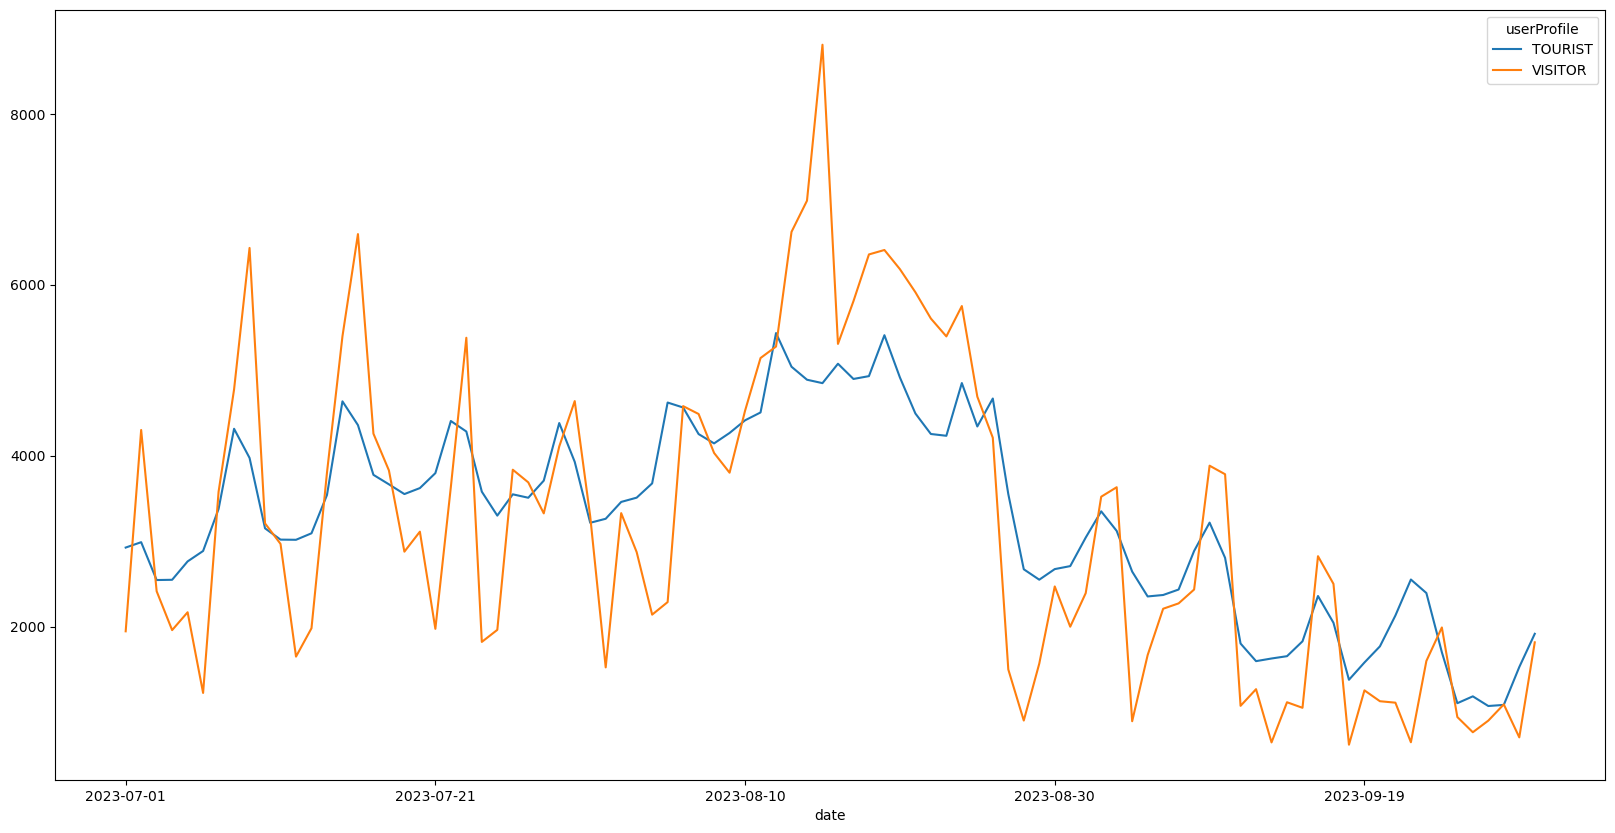

In [138]:
visitors_comune_molveno_df.groupby(["date", "userProfile"]).sum().unstack().plot(y="value", figsize=(20, 10))

In [139]:
visitors_comune_molveno_df.groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,302933
VISITOR,294223


In [140]:
tourists = visitors_comune_molveno_df.groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_comune_molveno_df.groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.5072929016873313, Excursionists: 0.49270709831266873


#### The ratio of tourists to excursionists in 'Comune Molveno' on day '15-08-2024'

In [141]:
visitors_comune_molveno_df[visitors_comune_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,4848
VISITOR,8808


In [142]:
tourists = visitors_comune_molveno_df[visitors_comune_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_comune_molveno_df[visitors_comune_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.35500878734622143, Excursionists: 0.6449912126537786


### Visitors rate in 'Lago Molveno'

In [143]:
visitors_lago_molveno_df = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    ((vodafone_attendences_df["locId"] == LOC_ID_LAGO_MOLVENO))
]
visitors_lago_molveno_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2981649,2023-07-01,TN_MKT_POI,LAGO_MOLV,AUT,TOURIST,A,18
2981657,2023-07-01,TN_MKT_POI,LAGO_MOLV,CZE,TOURIST,CZ,58
2981658,2023-07-01,TN_MKT_POI,LAGO_MOLV,CZE,VISITOR,CZ,47
2981659,2023-07-01,TN_MKT_POI,LAGO_MOLV,DEU,TOURIST,DE,195
2981660,2023-07-01,TN_MKT_POI,LAGO_MOLV,DEU,VISITOR,DE,57
...,...,...,...,...,...,...,...
3622979,2023-09-30,TN_MKT_POI,LAGO_MOLV,FRA,VISITOR,UE,22
3622985,2023-09-30,TN_MKT_POI,LAGO_MOLV,ITA,TOURIST,IT,858
3622986,2023-09-30,TN_MKT_POI,LAGO_MOLV,ITA,VISITOR,IT,809
3622994,2023-09-30,TN_MKT_POI,LAGO_MOLV,POL,TOURIST,PL,18


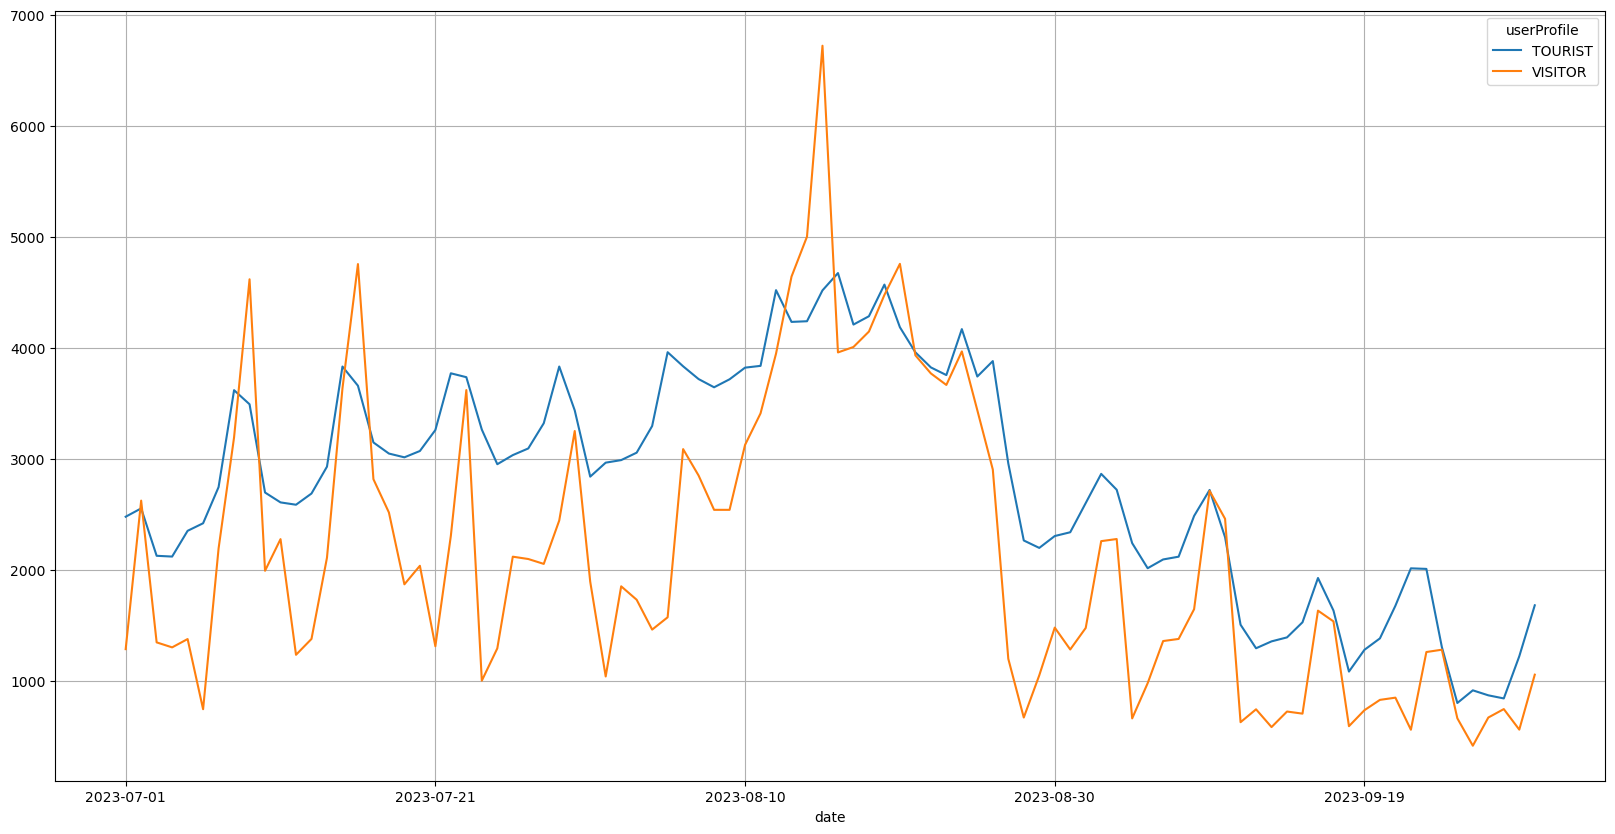

In [144]:
visitors_lago_molveno_df.groupby(["date", "userProfile"]).sum().unstack().plot(y="value", figsize=(20, 10))
plt.grid()

#### The ratio of tourists to excursionists in 'Spiaggia di Molveno'

In [145]:
visitors_lago = visitors_lago_molveno_df.groupby(["userProfile"])[["value"]].sum()
visitors_lago

,value
userProfile,
TOURIST,259379
VISITOR,197016


In [146]:
tourists = visitors_lago.groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_lago.groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.5683213006277457, Excursionists: 0.4316786993722543


#### The ratio of tourists to excursionists in 'Spiaggia di Molveno' on day '15/08/2023'

In [147]:
visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["date"])[["value"]].sum()

,value
date,
2023-08-15,11242


In [148]:
visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,4519
VISITOR,6723


In [149]:
tourists = visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
excursionists = visitors_lago_molveno_df[visitors_lago_molveno_df["date"] == "2023-08-15"].groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]
total = tourists + excursionists
results = calculate_tourist_excursionist_rate(total, tourists, excursionists)
print(results)

Tourists: 0.40197473759117597, Excursionists: 0.598025262408824


### Compare the ratio of tourists on the beach to the tourists in Molveno

In [150]:
grouped_vodafone_presences = vodafone_attendences_df.groupby(["date", "locId", "userProfile"])[["value"]].sum().reset_index()
grouped_vodafone_presences

,date,locId,userProfile,value
0,2022-01-01,100,COMMUTER,250
1,2022-01-01,100,INHABITANT,5749
2,2022-01-01,100,TOURIST,17429
3,2022-01-01,100,VISITOR,5929
4,2022-01-01,101,COMMUTER,308
...,...,...,...,...
478703,2024-03-31,STAZ_ROVE,VISITOR,1002
478704,2024-03-31,STAZ_TREN,COMMUTER,189
478705,2024-03-31,STAZ_TREN,INHABITANT,1561
478706,2024-03-31,STAZ_TREN,TOURIST,332


In [151]:
# presences in Molveno
vod_presences_molveno = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_COMUNE_MOLVENO]
vod_presences_molveno

,date,locId,userProfile,value
318,2022-01-01,27,COMMUTER,80
319,2022-01-01,27,INHABITANT,1115
320,2022-01-01,27,TOURIST,4550
321,2022-01-01,27,VISITOR,3130
895,2022-01-02,27,COMMUTER,68
...,...,...,...,...
477864,2024-03-30,27,VISITOR,623
478446,2024-03-31,27,COMMUTER,22
478447,2024-03-31,27,INHABITANT,785
478448,2024-03-31,27,TOURIST,930


In [152]:
# presences on the beach
vod_presences_lago = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_LAGO_MOLVENO]
vod_presences_lago

,date,locId,userProfile,value
552,2022-01-01,LAGO_MOLV,COMMUTER,53
553,2022-01-01,LAGO_MOLV,INHABITANT,755
554,2022-01-01,LAGO_MOLV,TOURIST,3375
555,2022-01-01,LAGO_MOLV,VISITOR,1565
1129,2022-01-02,LAGO_MOLV,COMMUTER,51
...,...,...,...,...
478102,2024-03-30,LAGO_MOLV,VISITOR,327
478682,2024-03-31,LAGO_MOLV,COMMUTER,0
478683,2024-03-31,LAGO_MOLV,INHABITANT,767
478684,2024-03-31,LAGO_MOLV,TOURIST,848


In [153]:
import numpy as np

In [154]:
merged_presences_molveno_lago = vod_presences_molveno.merge(vod_presences_lago, on=["date", "userProfile"], suffixes=('_molveno', '_lago'))
merged_presences_molveno_lago["date"] = pd.to_datetime(merged_presences_molveno_lago["date"])
merged_presences_molveno_lago

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago
0,2022-01-01,27,COMMUTER,80,LAGO_MOLV,53
1,2022-01-01,27,INHABITANT,1115,LAGO_MOLV,755
2,2022-01-01,27,TOURIST,4550,LAGO_MOLV,3375
3,2022-01-01,27,VISITOR,3130,LAGO_MOLV,1565
4,2022-01-02,27,COMMUTER,68,LAGO_MOLV,51
...,...,...,...,...,...,...
3271,2024-03-30,27,VISITOR,623,LAGO_MOLV,327
3272,2024-03-31,27,COMMUTER,22,LAGO_MOLV,0
3273,2024-03-31,27,INHABITANT,785,LAGO_MOLV,767
3274,2024-03-31,27,TOURIST,930,LAGO_MOLV,848


In [155]:
merged_presences_molveno_lago["ratio_lago_comune"] = (merged_presences_molveno_lago["value_lago"] / merged_presences_molveno_lago["value_molveno"]) * 100
merged_presences_molveno_lago = merged_presences_molveno_lago[
    (merged_presences_molveno_lago["date"] >= START_DATE) &
    (merged_presences_molveno_lago["date"] <= END_DATE) &
    (merged_presences_molveno_lago["userProfile"].isin(["TOURIST", "VISITOR"]))
]    
merged_presences_molveno_lago = merged_presences_molveno_lago[merged_presences_molveno_lago["date"].isin(contapersone["date"])]

merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].replace(np.inf, 0).fillna(0)
merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].apply(lambda el: int(el))
merged_presences_molveno_lago.sort_values(by=["ratio_lago_comune"], ascending=False)

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96
2365,2023-08-15,27,TOURIST,4848,LAGO_MOLV,4519,93
2369,2023-08-16,27,TOURIST,5075,LAGO_MOLV,4675,92
2277,2023-07-24,27,TOURIST,3578,LAGO_MOLV,3265,91
2309,2023-08-01,27,TOURIST,3261,LAGO_MOLV,2967,90
...,...,...,...,...,...,...,...
2494,2023-09-16,27,VISITOR,2823,LAGO_MOLV,1634,57
2290,2023-07-27,27,VISITOR,3687,LAGO_MOLV,2099,56
2314,2023-08-02,27,VISITOR,3327,LAGO_MOLV,1853,55
2286,2023-07-26,27,VISITOR,3835,LAGO_MOLV,2120,55


In [156]:
tourists_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "TOURIST"]
excursionist_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "VISITOR"]
#scaler for tourists values
tourists_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(tourists_presences[["ratio_lago_comune"]]) 
tourists_presences["presenze_lago"] = scaler.fit_transform(tourists_presences[["value_lago"]]) 
tourists_presences.sort_values(by=["ratio_lago_comune"], ascending=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2365,2023-08-15,27,TOURIST,4848,LAGO_MOLV,4519,93,1.000000,0.956546
2369,2023-08-16,27,TOURIST,5075,LAGO_MOLV,4675,92,0.933333,1.000000
2277,2023-07-24,27,TOURIST,3578,LAGO_MOLV,3265,91,0.866667,0.607242
2309,2023-08-01,27,TOURIST,3261,LAGO_MOLV,2967,90,0.800000,0.524234
2293,2023-07-28,27,TOURIST,3707,LAGO_MOLV,3322,89,0.733333,0.623120
...,...,...,...,...,...,...,...,...,...
2497,2023-09-17,27,TOURIST,2044,LAGO_MOLV,1635,79,0.066667,0.153203
2517,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79,0.066667,0.259053
2501,2023-09-18,27,TOURIST,1377,LAGO_MOLV,1085,78,0.000000,0.000000
2509,2023-09-20,27,TOURIST,1768,LAGO_MOLV,1384,78,0.000000,0.083287


In [157]:
excursionist_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(excursionist_presences[["ratio_lago_comune"]]) 
excursionist_presences["presenze_lago"] = scaler.fit_transform(excursionist_presences[["value_lago"]]) 
excursionist_presences.sort_values(by=["ratio_lago_comune"], ascending=False)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96,1.000000,0.005193
2482,2023-09-13,27,VISITOR,644,LAGO_MOLV,585,90,0.853659,0.003895
2518,2023-09-22,27,VISITOR,646,LAGO_MOLV,561,86,0.756098,0.000000
2414,2023-08-27,27,VISITOR,1498,LAGO_MOLV,1200,80,0.609756,0.103700
2514,2023-09-21,27,VISITOR,1109,LAGO_MOLV,850,76,0.512195,0.046900
...,...,...,...,...,...,...,...,...,...
2306,2023-07-31,27,VISITOR,3289,LAGO_MOLV,1895,57,0.048780,0.216488
2290,2023-07-27,27,VISITOR,3687,LAGO_MOLV,2099,56,0.024390,0.249594
2286,2023-07-26,27,VISITOR,3835,LAGO_MOLV,2120,55,0.000000,0.253002
2278,2023-07-24,27,VISITOR,1820,LAGO_MOLV,1003,55,0.000000,0.071730


In [158]:
tourists_presences.describe()

,date,value_molveno,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
count,70,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2023-08-18 12:00:00,3526.285714,3032.757143,85.100000,0.473333,0.542551
min,2023-07-15 00:00:00,1377.000000,1085.000000,78.000000,0.000000,0.000000
25%,2023-08-01 06:00:00,2670.500000,2273.250000,83.250000,0.350000,0.330989
50%,2023-08-18 12:00:00,3564.000000,3064.500000,85.000000,0.466667,0.551393
75%,2023-09-04 18:00:00,4399.000000,3824.500000,87.000000,0.600000,0.763092
max,2023-09-22 00:00:00,5434.000000,4675.000000,93.000000,1.000000,1.000000
std,NaN,1083.045533,964.380141,3.107494,0.207166,0.268630


In [159]:
excursionist_presences.describe()

,date,value_molveno,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
count,70,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2023-08-18 12:00:00,3457.685714,2323.757143,66.742857,0.286411,0.286069
min,2023-07-15 00:00:00,617.000000,561.000000,55.000000,0.000000,0.000000
25%,2023-08-01 06:00:00,1964.000000,1286.500000,61.250000,0.152439,0.117738
50%,2023-08-18 12:00:00,3423.000000,2077.000000,66.000000,0.268293,0.246024
75%,2023-09-04 18:00:00,4677.000000,3371.250000,69.000000,0.341463,0.456061
max,2023-09-22 00:00:00,8808.000000,6723.000000,96.000000,1.000000,1.000000
std,NaN,1889.485871,1366.318596,7.673946,0.187169,0.221733


In [160]:
merged_presences_molveno_lago.describe()

,date,value_molveno,value_lago,ratio_lago_comune
count,140,140.000000,140.000000,140.000000
mean,2023-08-18 12:00:00,3491.985714,2678.257143,75.921429
min,2023-07-15 00:00:00,617.000000,561.000000,55.000000
25%,2023-08-01 00:00:00,2355.750000,1619.000000,66.000000
50%,2023-08-18 12:00:00,3550.000000,2722.000000,79.000000
75%,2023-09-05 00:00:00,4510.000000,3738.500000,85.000000
max,2023-09-22 00:00:00,8808.000000,6723.000000,96.000000
std,NaN,1534.827523,1230.829599,10.903150


<AxesSubplot: xlabel='date'>

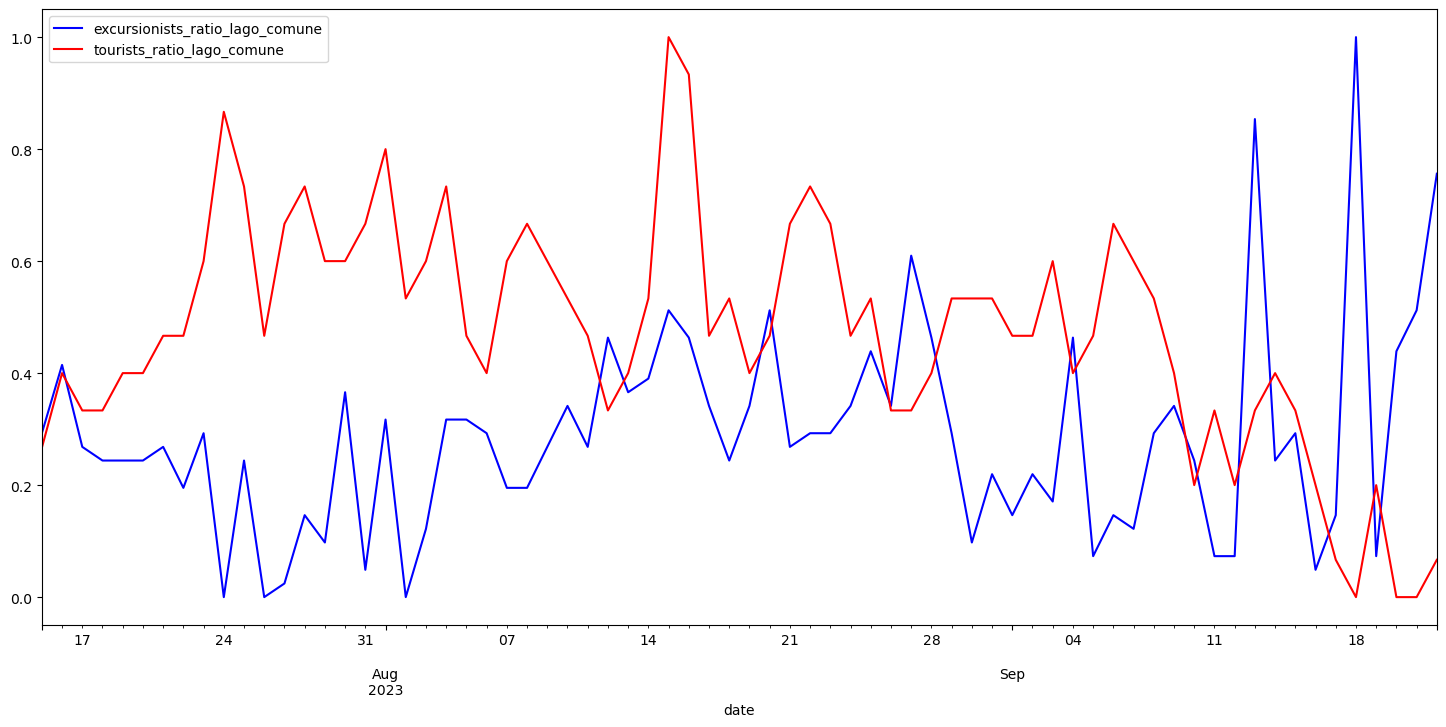

In [192]:
#TODO
ax = excursionist_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune", color="blue")
tourists_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune", color="red", figsize=(18, 8))

In [162]:
contapersone["date"]

0    2023-07-15
1    2023-07-16
2    2023-07-17
3    2023-07-18
4    2023-07-19
        ...    
65   2023-09-18
66   2023-09-19
67   2023-09-20
68   2023-09-21
69   2023-09-22
Name: date, Length: 70, dtype: datetime64[ns]

In [163]:
merged_presences_molveno_lago[merged_presences_molveno_lago["date"].isin(contapersone["date"])]

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune
2241,2023-07-15,27,TOURIST,4635,LAGO_MOLV,3833,82
2242,2023-07-15,27,VISITOR,5396,LAGO_MOLV,3636,67
2245,2023-07-16,27,TOURIST,4357,LAGO_MOLV,3660,84
2246,2023-07-16,27,VISITOR,6592,LAGO_MOLV,4756,72
2249,2023-07-17,27,TOURIST,3775,LAGO_MOLV,3149,83
...,...,...,...,...,...,...,...
2510,2023-09-20,27,VISITOR,1126,LAGO_MOLV,830,73
2513,2023-09-21,27,TOURIST,2129,LAGO_MOLV,1678,78
2514,2023-09-21,27,VISITOR,1109,LAGO_MOLV,850,76
2517,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79


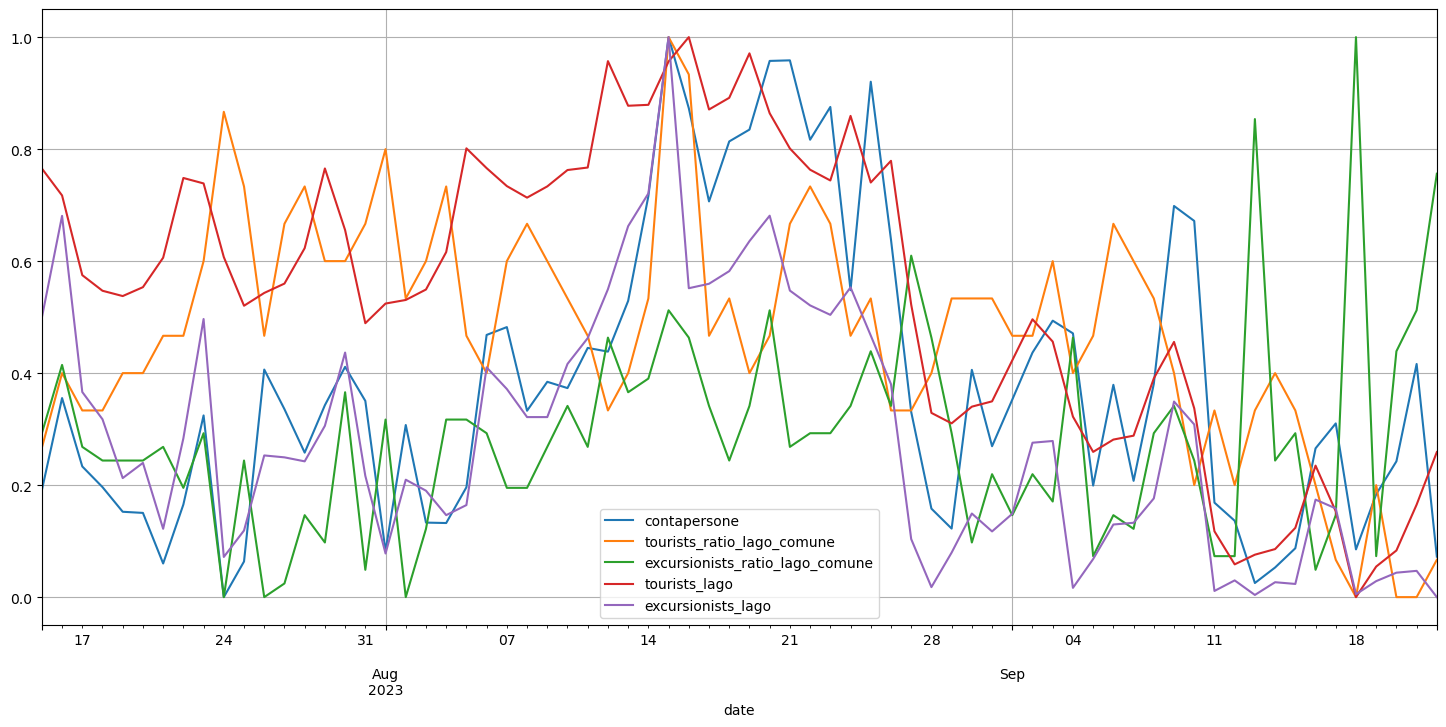

In [164]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
tourists_presences[["date", "ratio_lago_comune_scaled"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune")
excursionist_presences[["date", "ratio_lago_comune_scaled"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune")

tourists_presences[["date", "presenze_lago"]].plot(ax=ax,x="date", y="presenze_lago", label="tourists_lago")
excursionist_presences[["date", "presenze_lago"]].plot(ax=ax, x="date", y="presenze_lago", label="excursionists_lago", figsize=(18,8))
plt.grid()

In [165]:
correlation_entities = pd.concat([
    excursionist_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_excusrionists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_excursionists"}),
    tourists_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_tourists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_tourists"}),
    contapersone[["date", "contapersone_scaled"]].set_index("date")
], axis=1)
correlation_entities.corr()

,ratio_lago_comune_scaled_excursionists,presenze_lago_excusrionists,ratio_lago_comune_scaled_tourists,presenze_lago_tourists,contapersone_scaled
ratio_lago_comune_scaled_excursionists,1.000000,0.109677,-0.298525,0.012172,0.125345
presenze_lago_excusrionists,0.109677,1.000000,0.350007,0.842538,0.775338
ratio_lago_comune_scaled_tourists,-0.298525,0.350007,1.000000,0.533939,0.272408
presenze_lago_tourists,0.012172,0.842538,0.533939,1.000000,0.597868
contapersone_scaled,0.125345,0.775338,0.272408,0.597868,1.000000


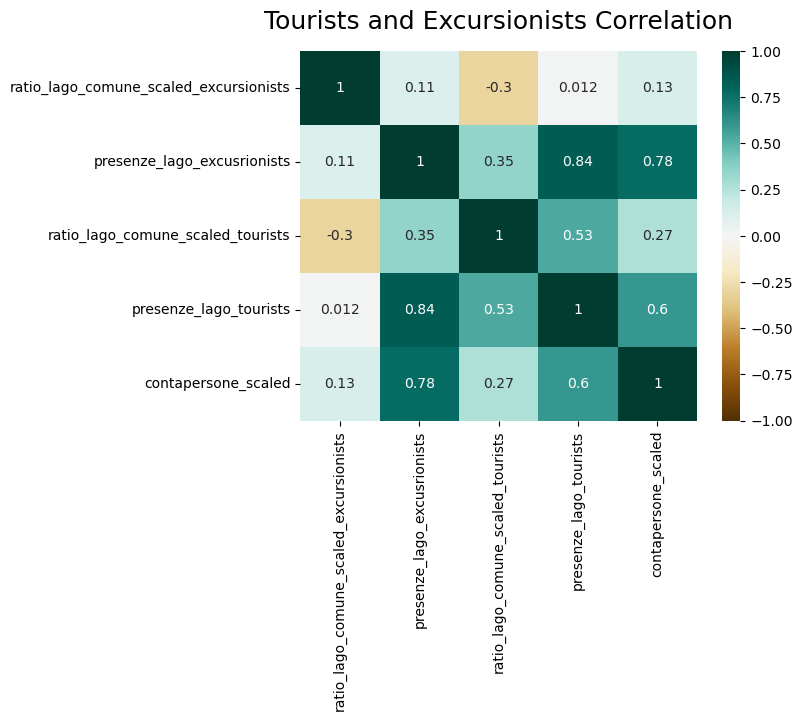

In [166]:
import seaborn as sns
heatmap = sns.heatmap(correlation_entities.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Tourists and Excursionists Correlation', fontdict={'fontsize':18}, pad=16);

# Events that may affect the beach presences

## Events

In [193]:
manifestazioni_df2 = manifestazioni_df[(manifestazioni_df["nr"] != "0") & (manifestazioni_df["nr"] != "0.0")]
manifestazioni_df2

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12 00:00:00,2023-03-18 00:00:00,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16 00:00:00,2023-03-19 00:00:00,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26 00:00:00,2023-07-08 00:00:00,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21 00:00:00,2023-04-22 00:00:00,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05 00:00:00,2023-08-20 00:00:00,20000,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08 00:00:00,2023-09-10 00:00:00,3500,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part
12,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2024-01-27 00:00:00,2024-03-16 00:00:00,6000,96000.0,96000.0,non serve,52,0.1,9600,2024_first_part
13,29,Trentino Mountain Bike Associazione Sportiva D...,15° Circuito Trentino MTB,0,2024-06-09 00:00:00,2024-10-30 00:00:00,25000,62000.0,62000.0,non serve,80.5,0.15,9300,2024_first_part


In [194]:
manifestazioni_df2["data_manifestazione_inizio"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_inizio"])
manifestazioni_df2["data_manifestazione_fine"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_fine"])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [281]:
eventi = pd.DataFrame(columns=["event_name", "date", "organizer", "location", "tot_participants", "participants"])
manifestazioni_df2["partecipanti_dichiarati"] = manifestazioni_df2["partecipanti_dichiarati"].astype(float).astype(int)
manifestazioni_filtered_df = manifestazioni_df2[manifestazioni_df2["data_manifestazione_inizio"] < "2024-01-27 00:00:00"]
manifestazioni_filtered_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12,2023-03-18,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16,2023-03-19,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26,2023-07-08,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21,2023-04-22,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21,2023-09-24,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05,2023-08-20,20000,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09,2023-09-09,2300,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08,2023-09-10,3500,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part


In [282]:
D = "D"
for event in manifestazioni_filtered_df.itertuples():
    start_date = event.data_manifestazione_inizio
    end_date = event.data_manifestazione_fine
    organizer = event.richiedente
    event_name = event.manifestazione
    location = event.luogo
    participants = int(event.partecipanti_dichiarati)
    random_participants = 0
    if participants > 0:
        date_list = pd.date_range(start_date, end_date, freq=D)       
        mean_nr = participants/len(date_list)
        for date in date_list:
            random_participants = np.random.randint(0, mean_nr)            
            row = {"event_name": event_name, "date": date , "organizer": organizer, "location": location, "tot_participants": participants, "participants": random_participants}
            eventi.loc[len(eventi)] = row
eventi = eventi[(eventi["date"] >= START_DATE) & (eventi["date"] < END_DATE)]
eventi

,event_name,date,organizer,location,tot_participants,participants
16,Scuola Estiva Internazionale Royal Academy of ...,2023-07-01,Royal Academy of Dance srl,Altopiano Paganella,1500,27
17,Scuola Estiva Internazionale Royal Academy of ...,2023-07-02,Royal Academy of Dance srl,Altopiano Paganella,1500,111
18,Scuola Estiva Internazionale Royal Academy of ...,2023-07-03,Royal Academy of Dance srl,Altopiano Paganella,1500,87
19,Scuola Estiva Internazionale Royal Academy of ...,2023-07-04,Royal Academy of Dance srl,Altopiano Paganella,1500,81
20,Scuola Estiva Internazionale Royal Academy of ...,2023-07-05,Royal Academy of Dance srl,Altopiano Paganella,1500,68
...,...,...,...,...,...,...
76,Criterium Gruppo Ciclistico Zambana,2023-08-20,Gruppo Ciclistico Zambana,Paganella,20000,211
77,XTERRA Dolomiti di Brenta Trail,2023-09-09,Molveno Holiday Scarl,Molveno,2300,1511
78,Orme-Festival dei sentieri sesta edizione,2023-09-08,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,45
79,Orme-Festival dei sentieri sesta edizione,2023-09-09,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,1096


In [283]:
eventi["scaled_total_participants"] = scaler.fit_transform(eventi[["tot_participants"]]) 
eventi["scaled_daily_participants"] = scaler.fit_transform(eventi[["participants"]]) 

<AxesSubplot: xlabel='date'>

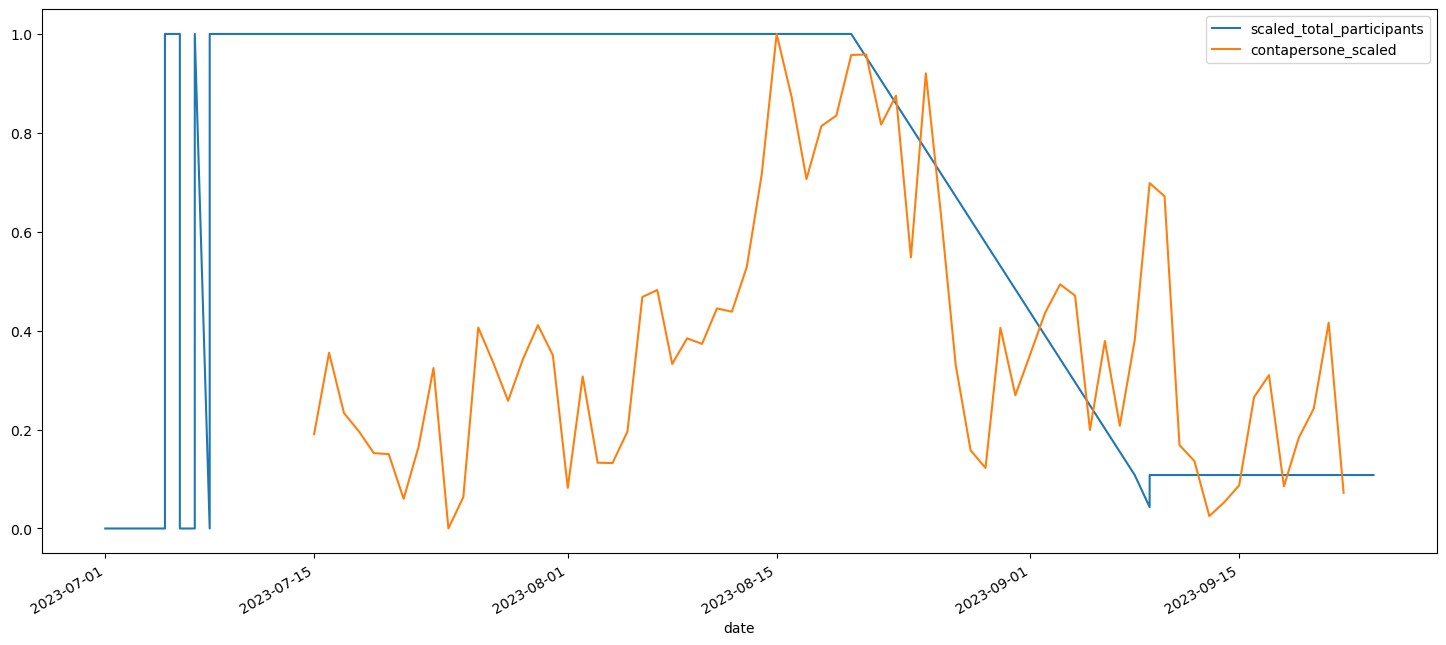

In [285]:
ax = eventi.plot(x="date", y="scaled_total_participants", figsize=(18,8))
contapersone[["date", "contapersone_scaled"]].plot(ax=ax, x="date", y="contapersone_scaled", figsize=(18,8))
# eventi.plot(ax=ax, x="date", y="scaled_daily_participants", figsize=(18,8)) this is a random generated number

## Meteo

In [292]:
meteo_timeframe_df.dtypes

date             datetime64[ns]
comune                   object
ambito                   object
meteo                    object
tmin                      int64
tmax                      int64
probprec06-12            object
intprec06-12             object
probtemp06-12            object
probprec12-18            object
intprec12-18             object
probtemp12-18            object
dtype: object

In [294]:
meteotrentino_bollettino_df.rename(columns={"data": "date"}, inplace=True)
meteotrentino_bollettino_df["date"] = pd.to_datetime(meteotrentino_bollettino_df["date"])
meteo_timeframe_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["date"] >= START_DATE) &
    (meteotrentino_bollettino_df["date"] <= END_DATE)
]

In [297]:
meteo_timeframe_df["tmin_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmin"]])
meteo_timeframe_df["tmax_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmax"]])
meteo_timeframe_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18,tmin_scaled,tmax_scaled
36742,2023-07-01,MOLVENO,DOLOMITI,Molto nuvoloso con piogge deboli,14,24,media,moderata,media,media,moderata,media,0.666667,0.529412
36784,2023-07-04,MOLVENO,DOLOMITI,Nuvoloso,13,23,molto bassa,debole,molto bassa,media,moderata,media,0.583333,0.470588
36806,2023-07-06,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,12,23,media,debole,media,alta,moderata,alta,0.500000,0.470588
36816,2023-07-08,MOLVENO,DOLOMITI,Poco nuvoloso,13,26,media,debole,molto bassa,bassa,debole,bassa,0.583333,0.647059
36841,2023-07-11,MOLVENO,DOLOMITI,Poco nuvoloso,18,31,molto bassa,debole,molto bassa,bassa,debole,bassa,1.000000,0.941176
36863,2023-07-14,MOLVENO,DOLOMITI,Poco nuvoloso,12,26,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,0.500000,0.647059
36885,2023-07-15,MOLVENO,DOLOMITI,Sereno,13,27,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,0.583333,0.705882
36907,2023-07-16,MOLVENO,DOLOMITI,Sereno,14,27,molto bassa,debole,molto bassa,bassa,debole,bassa,0.666667,0.705882
36929,2023-07-17,MOLVENO,DOLOMITI,Poco nuvoloso,16,28,molto bassa,debole,molto bassa,bassa,debole,bassa,0.833333,0.764706
36951,2023-07-19,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,15,28,bassa,debole,bassa,alta,moderata,alta,0.750000,0.764706


<AxesSubplot: xlabel='date'>

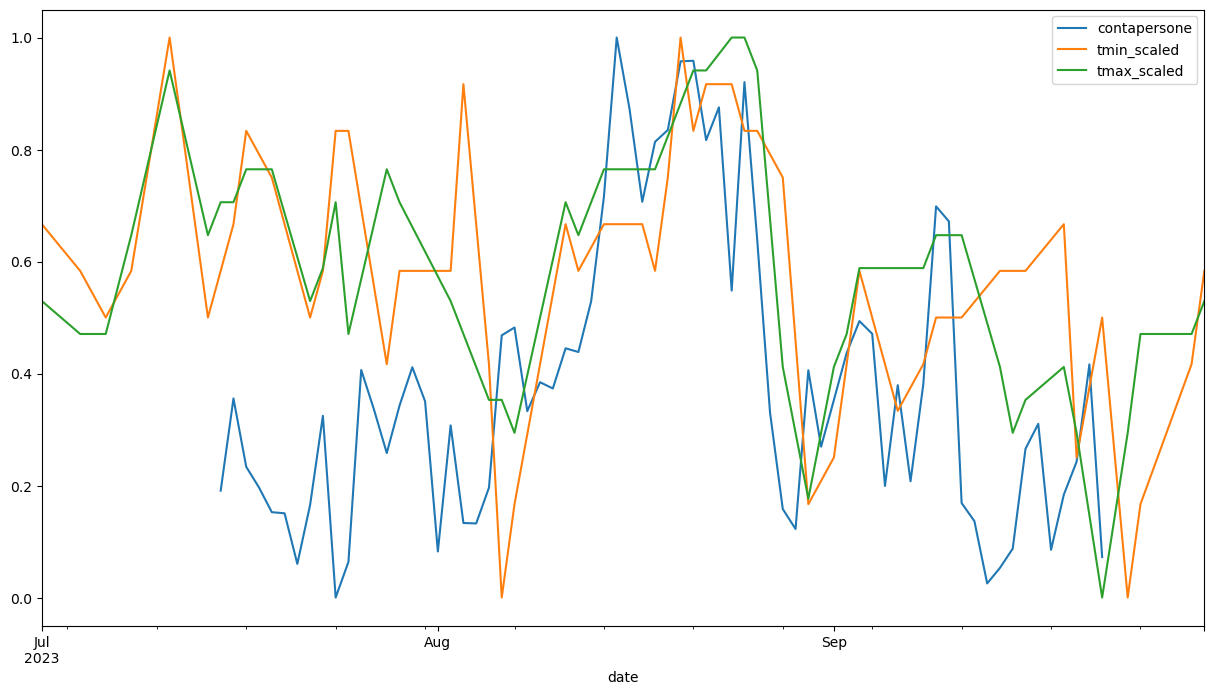

In [301]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
meteo_timeframe_df.plot(ax=ax, x="date", y="tmin_scaled", figsize=(15, 8))
meteo_timeframe_df.plot(ax=ax, x="date", y="tmax_scaled", figsize=(15, 8))


In [305]:
correlation_df = pd.concat([
    meteo_timeframe_df[["date", "tmin_scaled", "tmax_scaled"]].set_index("date"),
    contapersone[["date", "contapersone_scaled"]].set_index("date")    
], axis=1)
correlation_df.corr()

,tmin_scaled,tmax_scaled,contapersone_scaled
tmin_scaled,1.000000,0.667118,0.221367
tmax_scaled,0.667118,1.000000,0.617659
contapersone_scaled,0.221367,0.617659,1.000000


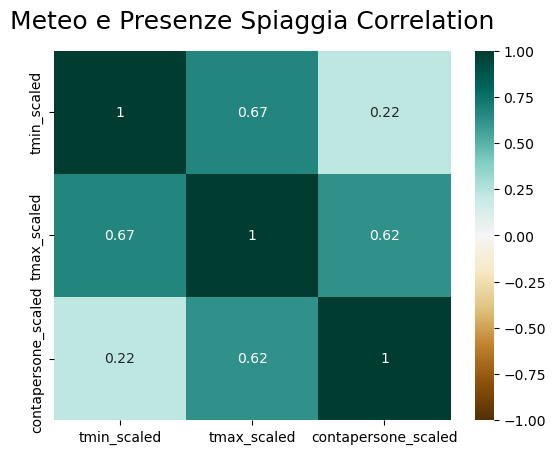

In [306]:
heatmap = sns.heatmap(correlation_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Meteo e Presenze Spiaggia Correlation', fontdict={'fontsize':18}, pad=16);

### TODO Dati pioggia

# Notes

In [33]:
attendances_timeframe_df.groupby(["userProfile"])[["value"]].sum()

,value
userProfile,
TOURIST,1335114
VISITOR,1120313


In [34]:
tourists = attendances_timeframe_df.groupby(["userProfile"])[["value"]].sum().loc["TOURIST"]["value"]
visitors = attendances_timeframe_df.groupby(["userProfile"])[["value"]].sum().loc["VISITOR"]["value"]

In [35]:
tot = tourists + visitors
tourists_rate = tourists/ tot
visitors_rate = visitors / tot

result = calculate_tourist_excursionist_rate(tot, tourists_rate, visitors_rate)

print(f"total number of visitors: {tot}")
print(f"tourists rate is: {result[0]}")
print(f"visitors rate is: {result[1]}")

total number of visitors: 2455427
tourists rate is: T
visitors rate is: o


In [36]:
attendances_timeframe_df.groupby("date").sum("value").reset_index().sort_values(by=["value"], ascending=False)

,date,value
45,2023-08-15,55354
44,2023-08-14,52307
49,2023-08-19,51852
48,2023-08-18,51159
43,2023-08-13,51098
...,...,...
4,2023-07-05,28980
59,2023-08-29,28887
3,2023-07-04,28789
2,2023-07-03,28369


In [37]:
attendances_timeframe_df2 = attendances_timeframe_df[["date", "value"]]

<AxesSubplot: xlabel='date'>

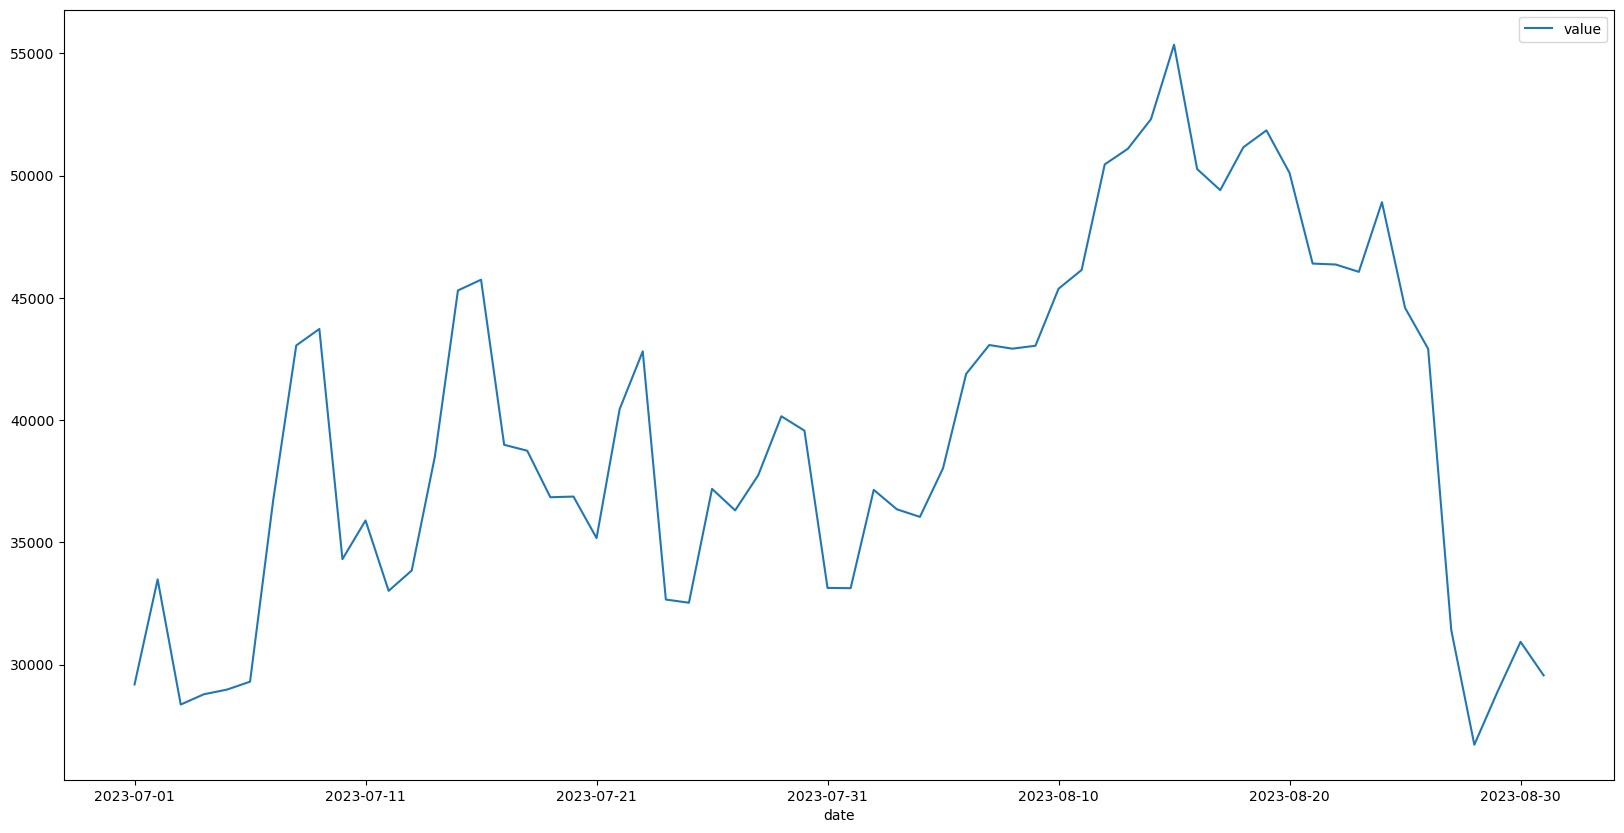

In [38]:
ax=None
attendances_timeframe_df2.groupby("date").sum("value").reset_index().plot(ax=ax, x="date", y="value", figsize=(20, 10))

In [39]:
statistiche_parcheggi_molveno_timeframe_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
339,0,4,3,3,3,4,8,4,3,12,...,0,0,0,0,0,0,0,0,44,2023-07-01
340,4,0,0,1,2,0,1,0,2,2,...,2,11,0,0,0,0,0,0,32,2023-07-02
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2023-07-03
342,3,0,1,2,4,4,5,6,2,2,...,0,0,0,0,0,0,0,0,31,2023-07-04
343,2,2,3,2,5,4,15,5,8,7,...,0,0,0,1,0,0,0,0,63,2023-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,4,6,5,6,1,3,1,1,0,...,0,0,0,0,0,0,0,0,29,2023-08-27
397,1,0,0,1,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5,2023-08-28
398,0,3,2,1,4,1,3,3,5,0,...,0,0,0,0,0,0,0,0,23,2023-08-29
399,1,0,2,0,2,1,8,2,3,0,...,0,0,0,0,0,0,0,0,25,2023-08-30


In [40]:
attendances_timeframe_df2.groupby("date").sum("value")

,value
date,
2023-07-01,29190
2023-07-02,33488
2023-07-03,28369
2023-07-04,28789
2023-07-05,28980
...,...
2023-08-27,31418
2023-08-28,26726
2023-08-29,28887


In [41]:
parcheggi_vodafone_df = pd.concat([
    statistiche_parcheggi_molveno_timeframe_df[["TOTALE", "date"]].set_index("date").rename(columns={'TOTALE':'parcheggi'}),
    attendances_timeframe_df2.groupby("date").sum("value").rename(columns={'value':'presenze_vodafone'})
])
parcheggi_vodafone_df["presenze_vodafone"] = parcheggi_vodafone_df["presenze_vodafone"].fillna(0).astype("int")
parcheggi_vodafone_df["parcheggi"] = parcheggi_vodafone_df["parcheggi"].fillna(0).astype("int")
parcheggi_vodafone_df

,parcheggi,presenze_vodafone
date,,
2023-07-01 00:00:00,44,0
2023-07-02 00:00:00,32,0
2023-07-03 00:00:00,0,0
2023-07-04 00:00:00,31,0
2023-07-05 00:00:00,63,0
...,...,...
2023-08-27,0,31418
2023-08-28,0,26726
2023-08-29,0,28887


# Example of Linear Programming

Linear programming: minimize a linear objective function subject to linear
    equality and inequality constraints.
    linprog() solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥)

In [118]:
from scipy.optimize import linprog
import numpy as np

A_ub = np.array([[7, -12, 5], 
                 [-5, 2, 1], 
                 [-4, 15, -10]]
               )
b_ub = np.array([14, 12, -50])
c = np.array([-4, 9, -1])

linprog(c=c, A_ub=A_ub, b_ub=b_ub)


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 18.205882352941163
              x: [ 1.029e+00  3.588e+00  9.971e+00]
            nit: 4
          lower:  residual: [ 1.029e+00  3.588e+00  9.971e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-4.103e+00 -3.132e+00 -2.265e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

We see that the solution vector we obtain is x=(1.03, 3.59, 9.98) with optimum value 18.21.

## Venezia LP example

Text(0, 0.5, '$y$')

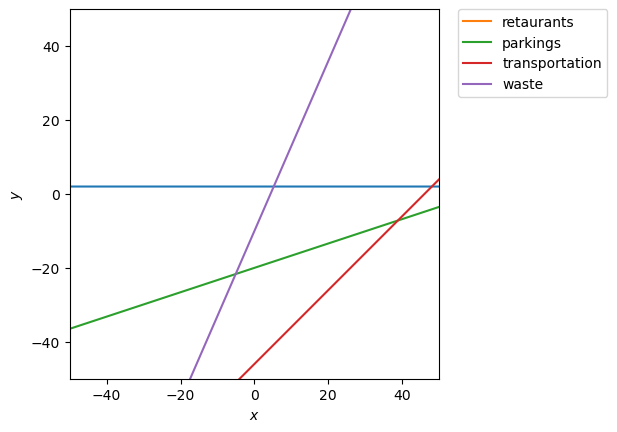

In [395]:
# plot the feasible region
d = np.linspace(-50,50,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=2) & (y<=0.75*x - 24) & (4*y>=2*x-8) & (y<=2*x-5)).astype(int), 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(-50, 50, 2000)

#0.75*T + 0.65*E ,= 24000
# E = (24000 - 0.75 * T) / 0.65
restaurants = 0.75*x - 24000
parkings = 0.33*x -20
transportation = x - 46
waste = 2.3 * x - 10

# Make plot
plt.plot(x, 2*np.ones_like(x))

plt.plot(x, restaurants, label=r'retaurants')
plt.plot(x, parkings, label=r'parkings')
plt.plot(x, transportation, label=r'transportation')
plt.plot(x, waste, label=r'waste')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


# Formulate LP model for Molveno

We want to maximize the number of TOURISTS and VISITORS (referring to the vodafone dataset), subject to the constraint(s) of the parking slots

In [409]:
!pip -qq install pulp

In [410]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [411]:
#Define the object of the model
problem = LpProblem("LP model", LpMaximize)

Spaces are not permitted in the name. Converted to '_'


In [412]:
#Define the decision variables
T = LpVariable("T", 0)
E = LpVariable("E", 0)

In [413]:
#Define the objective function
problem += 0.6*T + 0.4*E

In [414]:
print(f"{0.7/4*T + 0.3/4*x <= 1192}")
print(f"{(1192 - 0.7/4*T) / (0.3/4)}")

0.175*T <= 1192.0000000000002
-2.3333333333333335*T + 15893.333333333334


In [464]:
# Define the constraints
#problem += 0.2/4*T + 0.8/4*E <= 1257, "parkings constraint3"
problem += 0.05*T + 0.2*E <= 1257, "parkings constraint41"
# E = (1257 - 0.05T ) / 0.2 = 6285 - 0.05*T

#problem += 0.7/4*T + 0.3/4*E <= 1192, "transportations constraint3"
problem += 0.175*T + 0.075*E <= 24196, "transportations constraint41"
# E = (1192 - 0.175T) / 0.075 = 15893 - 2.3*T

#problem += 0.6*T + 0.2*E <= 4676, "beach constraint3"
problem += 0.6*T + 0.2*E <= 4676, "beach constraint14"
# E = (4676 - 0.6T) / 0.2 = 23380 - 3*T

#problem += T <= 2743, "accomodation constraint3"
problem += T <= 2743, "tourists constraint41"


In [465]:
problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/65b3eb6dc0ab4561b7569a6a4fde423c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/65b3eb6dc0ab4561b7569a6a4fde423c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 30 RHS
At line 39 BOUNDS
At line 40 ENDATA
Problem MODEL has 8 rows, 2 columns and 14 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-6) rows, 2 (0) columns and 4 (-10) elements
0  Obj -0 Dual inf 0.999998 (2)
1  Obj 3885.5
Optimal - objective value 3885.5
After Postsolve, objective 3885.5, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 3885.5 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



1

In [502]:
solution={}
for v in problem.variables():
    print(f"{v.name} = {v.varValue}")
    solution[f"{v.name}"] = f"{v.varValue}"
print(solution)    

E = 5599.25
T = 2743.0
{'E': '5599.25', 'T': '2743.0'}


In [418]:
value(problem.objective)

3885.5

In [419]:
max_parkings = 6285
max_beach = 23380

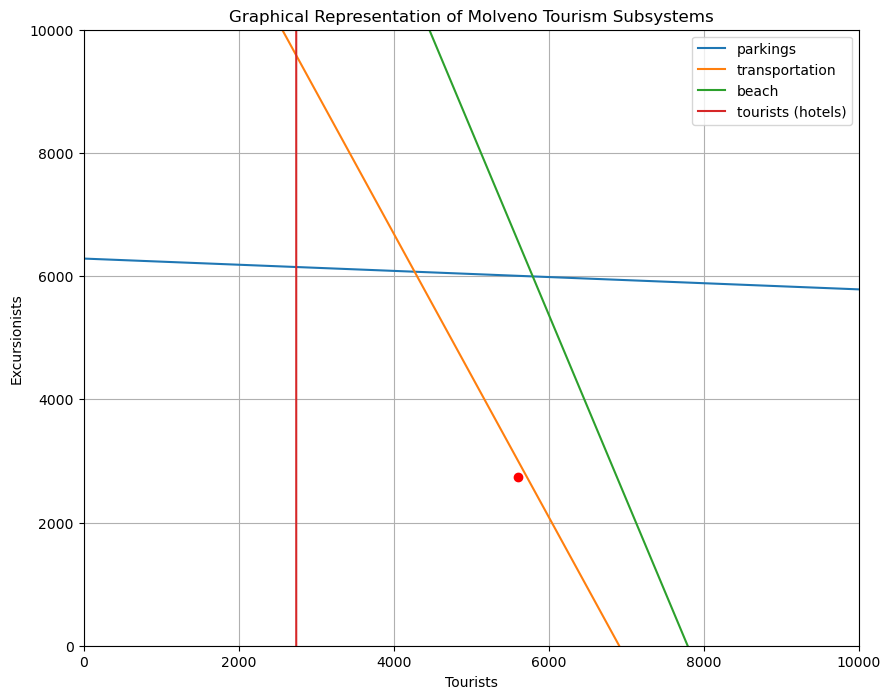

In [524]:
def plot_solution(max_parkings, max_beach):
    x = np.arange(0, 10000)

    plt.figure(figsize=(10, 8))
    plt.plot(x, max_parkings - 0.05 * x, label = "parkings")
    plt.plot(x, 15893 - 2.3 * x, label = "transportation")
    plt.plot(x, max_beach - 3 * x, label = "beach")
    plt.plot(2743*np.ones_like(x), x, label = "tourists (hotels)")

    plt.plot(int(float(solution["E"])), int(float(solution["T"])), marker='o', color='red')

    plt.xlabel("Tourists")
    plt.ylabel("Excursionists")
    plt.title('Graphical Representation of Molveno Tourism Subsystems')
            
    plt.axis([0, 10000, 0, 10000])
    plt.grid(True)    
    plt.legend()
    #plt.show()
plot_solution(max_parkings, max_beach)

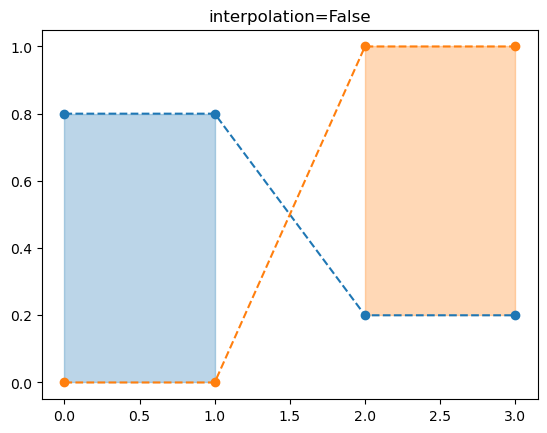

In [510]:
x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

fig, ax1 = plt.subplots(1, 1, sharex=True)

ax1.set_title('interpolation=False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)
ax1.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

#fig.tight_layout()

## Adding Interactive Controls for 'What-if' Scenarios

In [511]:
max_beach

23380

In [1]:
import ipywidgets as widgets

max_parkings_slider = widgets.IntSlider(value=max_parkings, min=100, max=7000, step=100, description='Max capacity parkings')
max_beach_slider = widgets.IntSlider(value=max_beach, min=100, max=7000, step=100, description='Max capacity beach')

def compute(max_parkings, max_beach):
    try:
        plot_solution(max_parkings, max_beach)
    except:
        pass

widgets.interactive(
    compute,
    max_parkings=max_parkings_slider.value,
    max_beach=max_beach_slider.value
)

NameError: name 'max_parkings' is not defined

## Time-varying what-if scenarios (TODO)

In [386]:
parameters_dataset = pd.DataFrame(data=[   
    {"month":"July", "subsystem": "parkings", "coefficient_name": "excusionists_rate", "coefficient_value": 0.8, "max_capacity": 1257},
    {"month":"July", "subsystem": "parkings", "coefficient_name": "tourists_rate", "coefficient_value": 0.2, "max_capacity": 1257},
    {"month":"July", "subsystem": "parkings", "coefficient_name": "cars_people_excusrionists", "coefficient_value": 3, "max_capacity": 1257},
    {"month":"July", "subsystem": "parkings", "coefficient_name": "cars_people_tourists", "coefficient_value": 3, "max_capacity": 1257},
    
    {"month":"August", "subsystem": "parkings", "coefficient_name": "excusionists_rate", "coefficient_value": 0.8, "max_capacity": 1257},
    {"month":"August", "subsystem": "parkings", "coefficient_name": "tourists_rate", "coefficient_value": 0.2, "max_capacity": 1257},
    {"month":"August", "subsystem": "parkings", "coefficient_name": "cars_people_excusrionists", "coefficient_value": 3, "max_capacity": 1257},
    {"month":"August", "subsystem": "parkings", "coefficient_name": "cars_people_tourists", "coefficient_value": 3, "max_capacity": 1257},
    
    {"month":"September", "subsystem": "parkings", "coefficient_name": "excusionists_rate", "coefficient_value": 0.8, "max_capacity": 1000},
    {"month":"September", "subsystem": "parkings", "coefficient_name": "tourists_rate", "coefficient_value": 0.2, "max_capacity": 1000},
    {"month":"September", "subsystem": "parkings", "coefficient_name": "cars_people_excusrionists", "coefficient_value": 3, "max_capacity": 1000},
    {"month":"September", "subsystem": "parkings", "coefficient_name": "cars_people_tourists", "coefficient_value": 3, "max_capacity": 1000}
])
parameters_dataset

,month,subsystem,coefficient_name,coefficient_value,max_capacity
0,July,parkings,excusionists_rate,0.8,1257
1,July,parkings,tourists_rate,0.2,1257
2,July,parkings,cars_people_excusrionists,3.0,1257
3,July,parkings,cars_people_tourists,3.0,1257
4,August,parkings,excusionists_rate,0.8,1257
5,August,parkings,tourists_rate,0.2,1257
6,August,parkings,cars_people_excusrionists,3.0,1257
7,August,parkings,cars_people_tourists,3.0,1257
8,September,parkings,excusionists_rate,0.8,1000
9,September,parkings,tourists_rate,0.2,1000


In [393]:
parameters_dataset[parameters_dataset["month"] == "July"]

,month,subsystem,coefficient_name,coefficient_value,max_capacity
0,July,parkings,excusionists_rate,0.8,1257
1,July,parkings,tourists_rate,0.2,1257
2,July,parkings,cars_people_excusrionists,3.0,1257
3,July,parkings,cars_people_tourists,3.0,1257


## Check constaints validity

In [ ]:
b T_B  * T +  b E_B * E <= 4676
